In [18]:
%%markdown

# Clustering CSGO Round Snapshots

In this notebook, we will explore the CSGO Round Snapshots dataset and perform clustering on the data. We will use KMeans and DBSCAN clustering algorithms to group similar round snapshots together.


# Clustering CSGO Round Snapshots

In this notebook, we will explore the CSGO Round Snapshots dataset and perform clustering on the data. We will use KMeans and DBSCAN clustering algorithms to group similar round snapshots together.


In [19]:
%%markdown

In this cell we are preparing the data for clustering. We are encoding the categorical variables and filling missing values in the numeric columns.


In this cell we are preparing the data for clustering. We are encoding the categorical variables and filling missing values in the numeric columns.


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

csgo_data = pd.read_csv('./resources/csgo_round_snapshots.csv')

# Identify numeric and non-numeric columns
numeric_columns = csgo_data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = csgo_data.select_dtypes(exclude=['int64', 'float64']).columns


csgo_data[numeric_columns] = csgo_data[numeric_columns].fillna(csgo_data[numeric_columns].mean())

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['map', 'bomb_planted', 'round_winner']  
for column in categorical_columns:
    if column in non_numeric_columns:  # Encode only non-numeric columns
        le = LabelEncoder()
        csgo_data[column] = le.fit_transform(csgo_data[column].astype(str))  # Convert to string if not already
        label_encoders[column] = le


print(csgo_data.head())

   time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0    1             0      500.0     500.0   
1     156.03       0.0      0.0    1             0      500.0     500.0   
2      96.03       0.0      0.0    1             0      391.0     400.0   
3      76.03       0.0      0.0    1             0      391.0     400.0   
4     174.97       1.0      0.0    1             0      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0

In [20]:
%%markdown

In this cell we are printing the correlation heatmap of the numeric columns in the dataset. This will help us understand the relationships between different features.


In this cell we are printing the correlation heatmap of the numeric columns in the dataset. This will help us understand the relationships between different features.


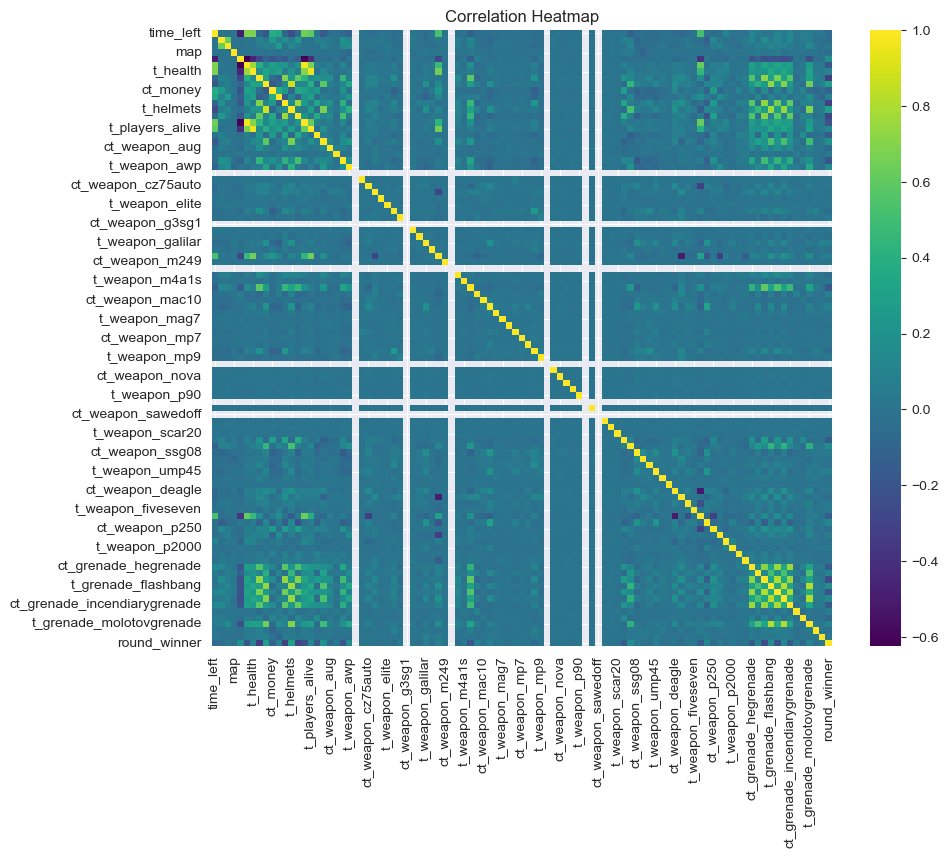

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(csgo_data.corr(), cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
%%markdown

In this cell we are performing KMeans and DBSCAN clustering on the data. We are using the numeric columns for clustering. We are adding the cluster labels back to the original DataFrame.


In this cell we are performing KMeans and DBSCAN clustering on the data. We are using the numeric columns for clustering. We are adding the cluster labels back to the original DataFrame.


In [16]:
from sklearn.cluster import KMeans, DBSCAN

# Preparing data for clustering (only using numeric columns)
data_for_clustering = csgo_data[numeric_columns]

# KMeans clustering with explicit n_init
kmeans = KMeans(n_clusters=3, n_init=10)  # Adjust n_clusters based on your analysis
kmeans_clusters = kmeans.fit_predict(data_for_clustering)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your analysis
dbscan_clusters = dbscan.fit_predict(data_for_clustering)

# Adding cluster labels back to the original DataFrame
csgo_data['kmeans_cluster'] = kmeans_clusters
csgo_data['dbscan_cluster'] = dbscan_clusters


In [22]:
%%markdown

In this cell we are plotting the clusters created by KMeans algorithm. We are using 'ct_players_alive' and 'ct_health' features for visualization.


In this cell we are plotting the clusters created by KMeans algorithm. We are using 'ct_players_alive' and 'ct_health' features for visualization.


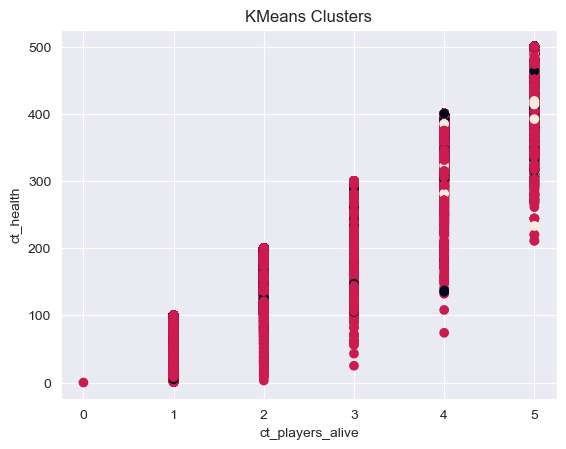

In [17]:
import matplotlib.pyplot as plt

# Assuming 'feature1' and 'feature2' are your chosen features
plt.scatter(csgo_data['ct_players_alive'], csgo_data['ct_health'], c=kmeans_clusters)
plt.title('KMeans Clusters')
plt.xlabel('ct_players_alive')
plt.ylabel('ct_health')
plt.show()